
# Week 1 Lab
Objective: The goal of this lab assignment is to understand the use of Python for data exploration and cleaning. You will work with the "Credit Card Fraud Detection" dataset, which you will use throughout the course.

Dataset: For this lab, we will use the "Credit Card Fraud Detection" dataset from the Outlier Detection DataSets (ODDS) repository. This dataset contains transactions made by credit cards in September 2013 by European cardholders, with a total of 284,807 transactions.

## Lab Instructions

### Load the Dataset:
- Import necessary libraries: Import pandas and numpy.
- Load the dataset: Load the dataset into a pandas DataFrame.
- Display the first few rows: Use the head() method to display the first few rows of the dataset.

### Lab Tasks:

#### Setup and Environment Configuration:
- Install Anaconda: Follow the instructions in Chapter 1 to download and install Anaconda.
- Create a new environment: Create a new Python environment using Anaconda.
- Install necessary libraries: Ensure you install pandas, numpy, matplotlib, seaborn, and scikit-learn.

#### Data Acquisition:
- Download the dataset: Use the link to the Credit Card Fraud Detection dataset.
- Load the dataset: Write a Python script to load the dataset into a pandas DataFrame.

#### Data Exploration:
- Overview of the dataset: Use the head(), info(), and describe() methods to get an initial understanding of the data.
- Check for missing values: Write a script to check and handle missing values if any.
- Basic statistics: Calculate basic statistics (mean, median, mode, range, standard deviation) for the numerical features.

#### Data Cleaning:
- Handle missing data: Demonstrate techniques to handle missing data, such as imputation or removal.
- Data type conversion: Ensure all columns are of the correct data type.
- Duplicate removal: Check for and remove any duplicate entries in the dataset.

#### Initial Data Visualization:
- Plot histograms: Create histograms for the numerical features to understand their distributions.
- Correlation matrix: Create a correlation matrix and a heatmap to identify relationships between variables.

## Submission:
Submit a Jupyter Notebook (.ipynb file) or RStudio or .py file containing the code for all tasks.



## Part 1

In [ ]:
%%bash
# Install necessary libraries
pip install numpy pandas

In [ ]:
import pandas as pd
data = pd.read_csv('./creditCardData.csv')
print(data.head())

## Part 2

## Setup and Environment Configuration

In [ ]:
%%bash
conda install ipykernel pandas numpy matplotlib seaborn scikit-learn

In [ ]:
#valid values
validEducation = {
    '1': 'graduate_school',
    '2': 'university',
    '3': 'high_school',
    '4': 'other',
}

validSex= {
    '1': 'male',
    '2': 'female',
}

validMarriage = {
    '1': 'married',
    '2': 'single',
    '3': 'other',
}

validPay = [
    '-2',
    '-1',
    '0',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9'
]


## Data Acquisition:

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('./creditCardData.csv')

In [ ]:
# Convert columns to the desired data types
data['ID'] = data['ID'].astype(str)
data['LIMIT_BAL'] = data['LIMIT_BAL'].astype('int64')
data['SEX'] = data['SEX'].astype(str)
data['EDUCATION'] = data['EDUCATION'].astype(str)
data['MARRIAGE'] = data['MARRIAGE'].astype(str)
data['AGE'] = data['AGE'].astype(str)
data['PAY_0'] = data['PAY_0'].astype(str)
data['PAY_2'] = data['PAY_2'].astype(str)
data['PAY_3'] = data['PAY_3'].astype(str)
data['PAY_4'] = data['PAY_4'].astype(str)
data['PAY_5'] = data['PAY_5'].astype(str)
data['PAY_6'] = data['PAY_6'].astype(str)
data['BILL_AMT1'] = data['BILL_AMT1'].astype('int64')
data['BILL_AMT2'] = data['BILL_AMT2'].astype('int64')
data['BILL_AMT3'] = data['BILL_AMT3'].astype('int64')
data['BILL_AMT4'] = data['BILL_AMT4'].astype('int64')
data['BILL_AMT5'] = data['BILL_AMT5'].astype('int64')
data['BILL_AMT6'] = data['BILL_AMT6'].astype('int64')
data['PAY_AMT1'] = data['PAY_AMT1'].astype('int64')
data['PAY_AMT2'] = data['PAY_AMT2'].astype('int64')
data['PAY_AMT3'] = data['PAY_AMT3'].astype('int64')
data['PAY_AMT4'] = data['PAY_AMT4'].astype('int64')
data['PAY_AMT5'] = data['PAY_AMT5'].astype('int64')
data['PAY_AMT6'] = data['PAY_AMT6'].astype('int64')
data['Default_Payment_Next_Month'] = data['Default_Payment_Next_Month'].astype(str)

In [ ]:
# Print types 
print(data.dtypes)

## Data Exploration:

In [ ]:
#Print head
print(f'HEAD:\n{data.head()}')

In [ ]:
#print Info
print(data.info())

In [ ]:
#print description
print(data.describe())

In [ ]:
#check for null
missingCount = data.isnull().sum()
print(missingCount)

In [ ]:
# Get basic Stats and replace na 
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
stats = {}
for col in numerical_cols:
    stats[col]={
        "Mean": data[col].mean(),
        "Median": data[col].median(),
        "Mode": data[col].mode()[0],
        "Range": data[col].max() - data[col].min(),
        "Standard Deviation": data[col].std()
    }
data_stats = pd.DataFrame(stats)
print(data_stats)

## Data Cleaning:

In [ ]:
#Handle Missing Data
# if a column is numeric we will repalce NA with the median for the column
for col in numerical_cols:
    if missingCount[col] !=0:
        data = data[col].fillna(data[col].median())
# the we drop all other rows with NA
data = data.dropna(how='all')

#Check all Na have been fixed
missingCount = data.isnull().sum()
print(missingCount)



In [ ]:
#Did the Data type conversion at the top
print(data.dtypes)

In [ ]:
#data validation
pay_col = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
# validate sex by removal
sexInvalidMask = ~data['SEX'].isin(validSex)
data = data.loc[~sexInvalidMask]
# validate education by consolidation to 4 other
educationInvalidMask = ~data['EDUCATION'].isin(validEducation)
data.loc[educationInvalidMask, 'EDUCATION'] = '4'
# validate pay status by removal
payInvalidMask = ~data[pay_col].isin(validPay).all(axis=1)
data = data.loc[~payInvalidMask]
# validate marriage by cosolidation to 3 other
marriageInvalidMask = ~data['MARRIAGE'].isin(validMarriage)
data.loc[marriageInvalidMask, 'MARRIAGE'] = '3'


In [ ]:
#Duplicate Removal
if data['ID'].nunique() != data.shape[0]:
    duplicates = data[data.duplicated(subset=['ID'],keep='first')]
    print(duplicates)
print(data)

## Initial Data Visualization:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
# Plot Histogram
for col in data.columns:
    if col == 'ID':
        continue
    print(col)
    plt.figure(figsize=(8, 6))  # Create a new figure for each histogram with a specific size
    sns.histplot(data[col], kde=True, bins=30)  # Create the histogram with KDE
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.show()
plt.close()

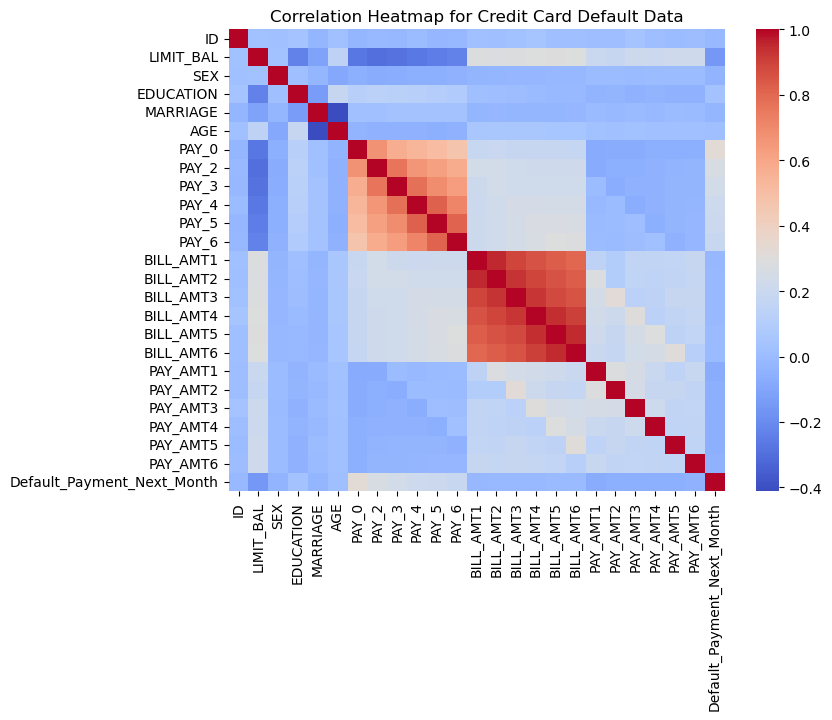

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.037659   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.231088   
SEX                         0.018497   0.024755  1.000000   0.013627   
EDUCATION                   0.037659  -0.231088  0.013627   1.000000   
MARRIAGE                   -0.028208  -0.111012 -0.028522  -0.136797   
AGE                         0.018678   0.144713 -0.090874   0.182434   
PAY_0                      -0.030575  -0.271214 -0.057643   0.112593   
PAY_2                      -0.011215  -0.296382 -0.070771   0.129703   
PAY_3                      -0.018494  -0.286123 -0.066096   0.122425   
PAY_4                      -0.002735  -0.267460 -0.060173   0.116531   
PAY_5                      -0.022199  -0.249411 -0.055064   0.104088   
PAY_6                      -0.020270  -0.235195 -0.044008   0.088986   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.01

In [223]:
# Correlation Matrix
correlationMatrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlationMatrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Credit Card Default Data')
plt.show()
plt.close()
print(correlationMatrix)